In [ ]:
# !wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/skymaps/7yr/raw/wmap_band_iqumap_r9_7yr_W_v4.fits;wget -c http://lambda.gsfc.nasa.gov/data/map/dr4/ancillary/masks/wmap_temperature_analysis_mask_r9_7yr_v4.fits

# !curl -f -O https://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/maps/LFI_SkyMap_070_1024_R3.00_full.fits

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import healpy as hp
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
import os


In [ ]:
# Path to the FITS file
fits_file_path2 = f'{os.getcwd()}/Data/galactic_output_map_1.fits'

fits_file_path = f'{os.getcwd()}/Data/COM_CMB_IQU-smica-nosz_2048_R3.00_full.fits'

# Open the FITS file and retrieve the header
with fits.open(fits_file_path2) as hdul:
    header = hdul[1].header

# Print the header
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                12288 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'T       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

In [25]:
Planck_Smica_map = hp.read_map(fits_file_path, field =0)
Planck_Smica_map_2 = hp.read_map(fits_file_path2, field =0)

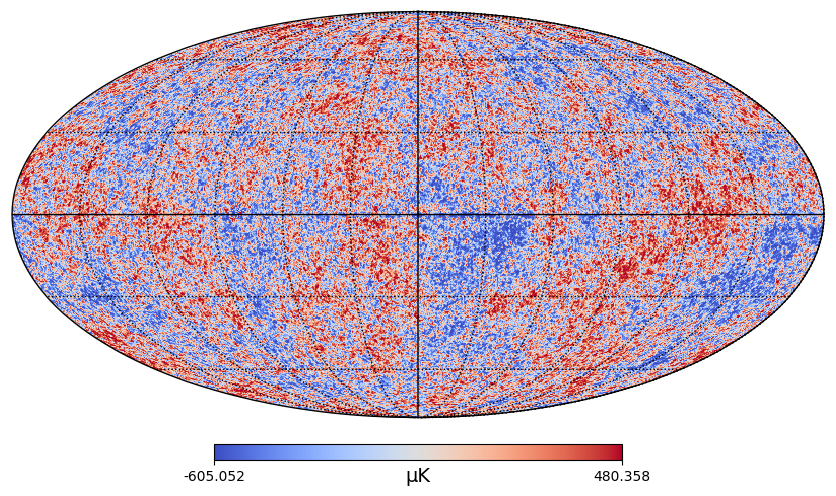

In [28]:
hp.mollview(
    Planck_Smica_map_2*1e6,
    title = "",
    # title="Planck DR3 SMICA-noSZ",
    unit="μK",
    norm="hist",
    cmap ='coolwarm',
)
hp.graticule()
plt.savefig('output/Planck_DR3_SMICA_2048.png')
plt.show()

In [7]:
fits_output_path = "Data/galactic_output_map_1.fits"
fits_output_path = "Data/CMB-Planck_Smica_nosz_map_2048_R3.fits"

# hp.write_map(fits_output_path, Planck_Smica_map, overwrite=False)

with fits.open(fits_file_path) as hdul:
    header = hdul[1].header

# Print the header
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    8 / width of table in bytes                        
NAXIS2  =             50331648 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
COMMENT  -------------------------------------------------------------          
COMMENT  Products from SMICA component separation method                        
COMMENT  -------------------------------------------------------------          
COMMENT  Further details in the Planck Legacy Archive and Explanatory Supplement
COMMENT  http://www.cosmos.e

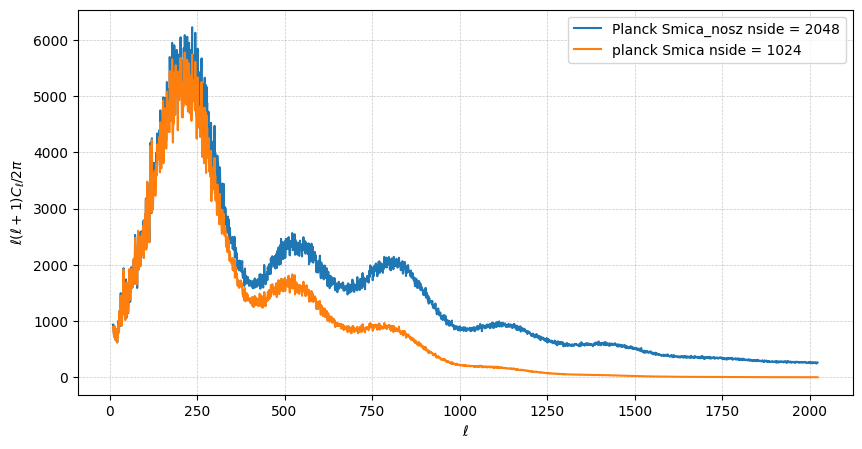

In [8]:
LMAX = 2024
cl = hp.anafast(Planck_Smica_map,  lmax=LMAX)
cl2 = hp.anafast(Planck_Smica_map_2,  lmax=LMAX)
ell = np.arange(len(cl))


hp.write_cl("cl_planck.fits", cl*1e12, overwrite=True)

plt.figure(figsize=(10, 5))
plt.plot(ell[10:-1], (ell * (ell + 1) * cl *1e12/(2*np.pi))[10:-1], label="Planck Smica_nosz nside = 2048")
plt.plot(ell[10:-1], (ell * (ell + 1) * cl2 *1e12/(2*np.pi))[10:-1], label="planck Smica nside = 1024")
# plt.scatter(ell[10:-1], (ell * (ell + 1) * cl *1.9e6/(2*np.pi))[10:-1], s=3 )
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell} / 2\pi $")
# plt.xscale("log")
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

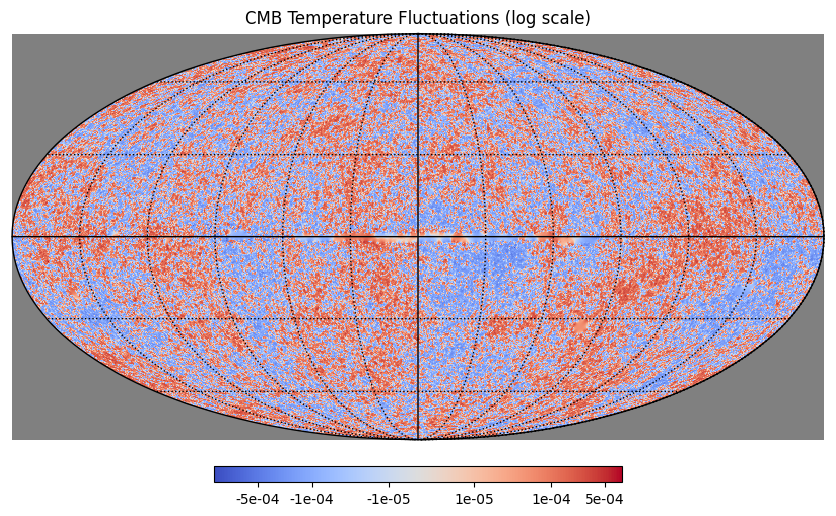

In [9]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

# Load the CMB map (Replace with actual file)
cmb_map = Planck_Smica_map
# Define normalization using SymLogNorm
norm = SymLogNorm(linthresh=1e-5, linscale=0.5, vmin=-1e-3, vmax=1e-3, base=10)


# Create a figure
fig = plt.figure(figsize=(10, 5))
# Plot the CMB map with log color scale and diverging colormap
hp.mollview(cmb_map, norm=norm , cmap="coolwarm", title="CMB Temperature Fluctuations (log scale)")

# Add graticules
hp.graticule()


# Retrieve all axes from the current figure
axes = plt.gcf().get_axes()

# Check if there is a colorbar
if len(axes) > 1:
    cbar = axes[1]  # The second axis in the list is the colorbar

    # Define custom tick locations
    tick_values = [ -5e-4, -1e-4, -1e-5, 1e-5,  1e-4, 5e-4]
    
    # Set custom ticks
    cbar.set_xticks(tick_values)
    cbar.set_xticklabels([f"{t:.0e}" for t in tick_values])
    cbar.set_label("Temperature Fluctuations (K)")

plt.show()


# # Define a threshold for log scaling (set a small value to avoid log(0))
# linthresh = 1e-5  # Values below this are plotted linearly

# # Create the plot
# hp.mollview(
#     cmb_map,
#     norm=SymLogNorm(linthresh, base=10),  # Symmetric log normalization
#     cmap="coolwarm",  # Blue for negative, red for positive
#     title="CMB Temperature Fluctuations (SymLog Scale)"
# )

# # Add grid
# hp.graticule()
# plt.show()


In [10]:
wmap_map_I = hp.read_map("Data/wmap_band_iqumap_r9_7yr_W_v4.fits")


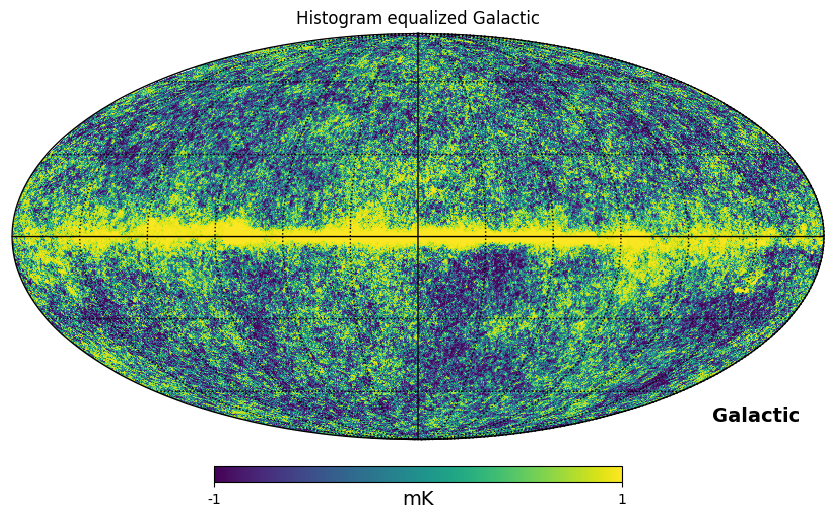

In [11]:
hp.mollview(
    wmap_map_I,
    coord=["G"],
    title="Histogram equalized Galactic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

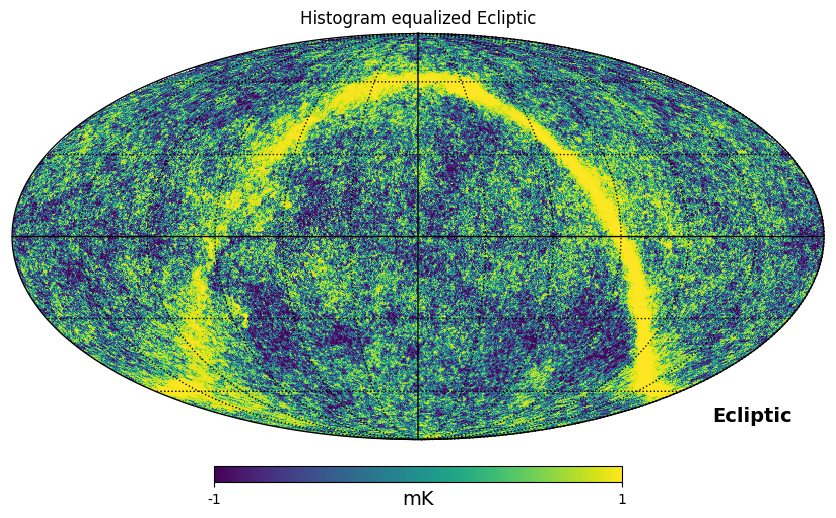

In [12]:
hp.mollview(
    wmap_map_I,
    coord=["G", "E"],
    title="Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

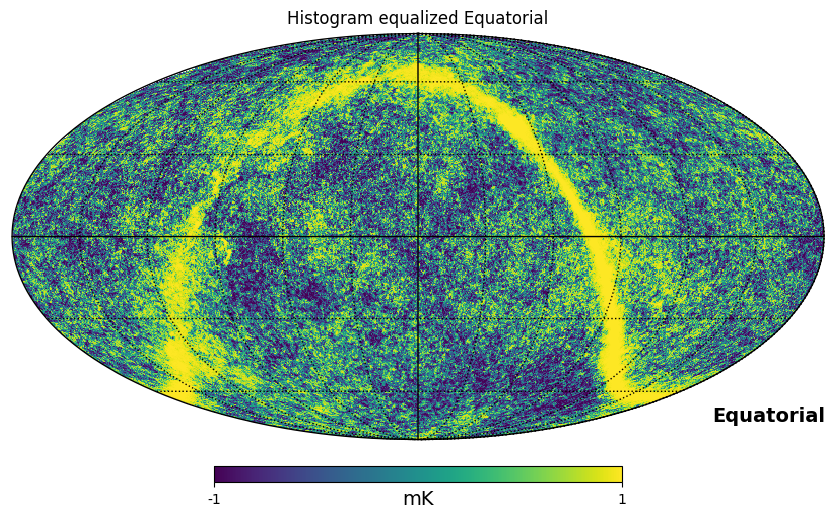

In [13]:
hp.mollview(
    wmap_map_I,
    coord=["G", "C"],
    title="Histogram equalized Equatorial",
    unit="mK",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

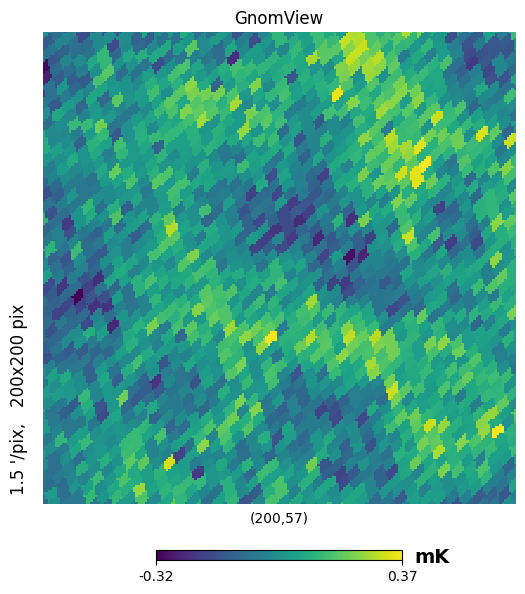

In [14]:
hp.gnomview(wmap_map_I, rot=[200, 57], title="GnomView", unit="mK", format="%.2g")


In [15]:
mask = hp.read_map("Data/wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

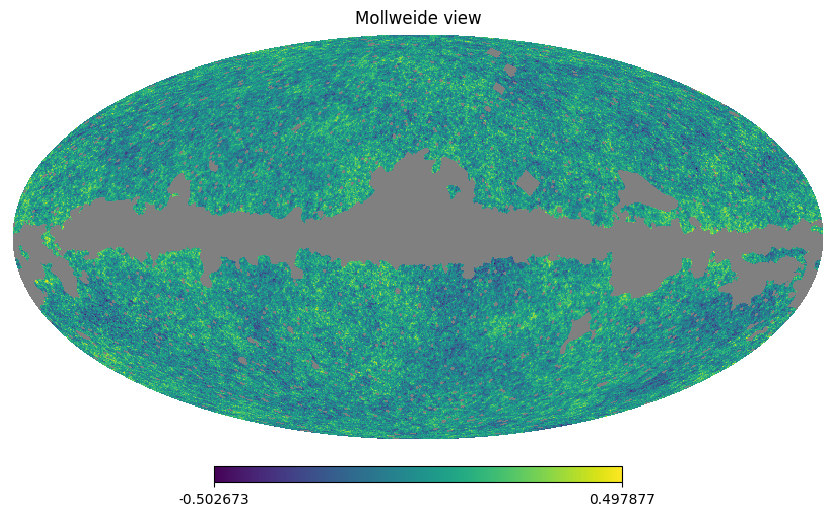

In [16]:
hp.mollview(wmap_map_I_masked.filled())


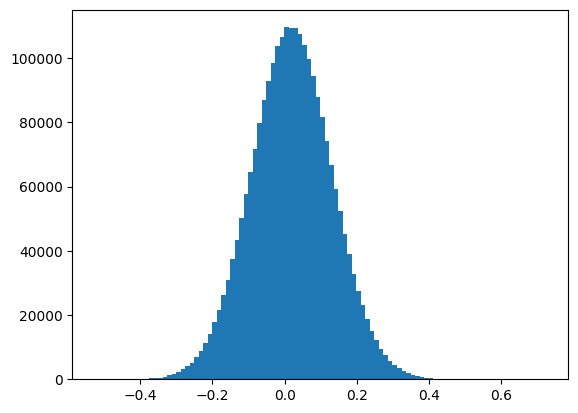

In [17]:
plt.hist(wmap_map_I_masked.compressed(), bins=100);

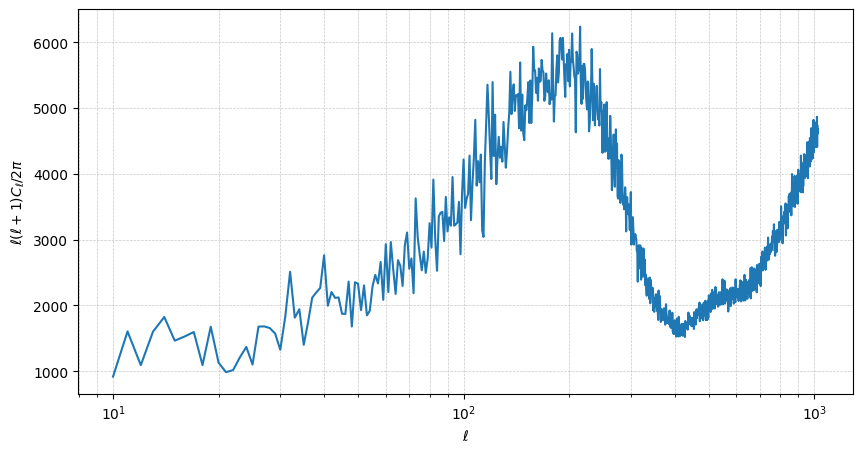

In [18]:

LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(),  lmax=LMAX)
ell = np.arange(len(cl))

plt.figure(figsize=(10, 5))
plt.plot(ell[10:-1], (ell * (ell + 1) * cl *1.9e6/(2*np.pi))[10:-1])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell} / 2\pi $")
plt.xscale("log")
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
hp.write_cl("cl.fits", cl, overwrite=True)

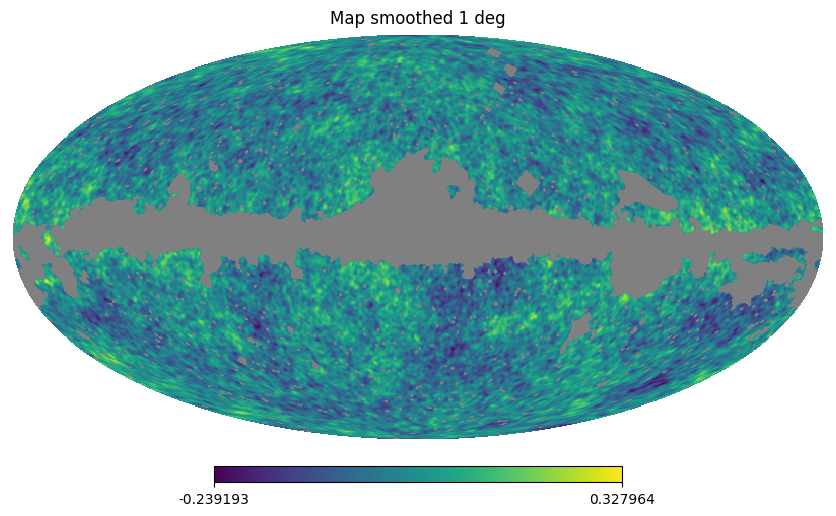

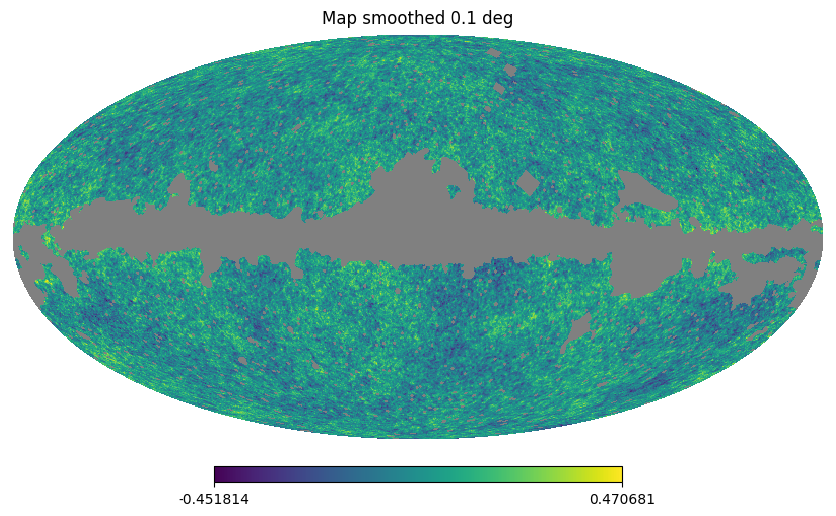

In [19]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I_masked.filled(), fwhm=np.radians(1))
hp.mollview(wmap_map_I_smoothed, title="Map smoothed 1 deg")
wmap_map_I_smoothed = hp.smoothing(wmap_map_I_masked.filled(), fwhm=np.radians(0.1))
hp.mollview(wmap_map_I_smoothed, title="Map smoothed 0.1 deg")


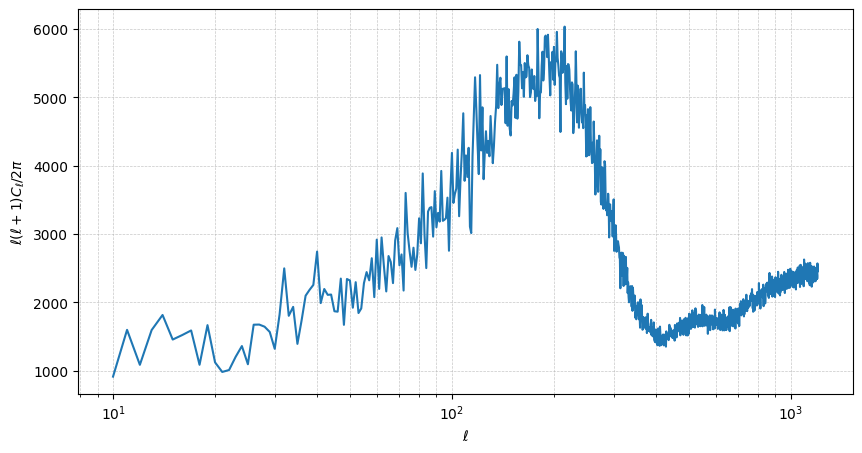

In [20]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I_masked.filled(), fwhm=np.radians(0.11)) #13/60
# hp.mollview(wmap_map_I_smoothed, title="Map smoothed 0.1 deg")

LMAX = 1200
cl = hp.anafast(wmap_map_I_smoothed,  lmax=LMAX)
ell = np.arange(len(cl))

plt.figure(figsize=(10, 5))
plt.plot(ell[10:-1], (ell * (ell + 1) * cl *1.9e6/(2*np.pi))[10:-1])
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell} / 2\pi $")
plt.xscale("log")
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
hp.write_cl("cl.fits", cl, overwrite=True)